# Feature Scaling and Normalization - Lab

## Introduction
In this lab, you'll practice your feature scaling and normalization skills!

## Objectives
You will be able to:
* Identify if it is necessary to perform log transformations on a set of features
* Perform log transformations on different features of a dataset
* Determine if it is necessary to perform normalization/standardization for a specific model or set of data
* Compare the different standardization and normalization techniques
* Use standardization/normalization on features of a dataset

## Back to the Ames Housing data

Let's import our Ames Housing data.

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

ames = pd.read_csv('ames.csv')

## Look at the histograms for the continuous variables

Since there are so many features it is helpful to filter the columns by datatype and number of unique values. A heuristic you might use to select continous variables might be a combination of features that are not object datatypes and have at least a certain amount of unique values.

In [16]:
# Your code here
cat_data = ames.loc[:, ((ames.dtypes != 'object') & (ames.nunique() > 20))]
cat_data

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,LowQualFinSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MiscVal,SalePrice
0,1,65.0,8450,2003,2003,196.0,706,0,150,856,...,0,1710,2003.0,548,0,61,0,0,0,208500
1,2,80.0,9600,1976,1976,0.0,978,0,284,1262,...,0,1262,1976.0,460,298,0,0,0,0,181500
2,3,68.0,11250,2001,2002,162.0,486,0,434,920,...,0,1786,2001.0,608,0,42,0,0,0,223500
3,4,60.0,9550,1915,1970,0.0,216,0,540,756,...,0,1717,1998.0,642,0,35,272,0,0,140000
4,5,84.0,14260,2000,2000,350.0,655,0,490,1145,...,0,2198,2000.0,836,192,84,0,0,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,62.0,7917,1999,2000,0.0,0,0,953,953,...,0,1647,1999.0,460,0,40,0,0,0,175000
1456,1457,85.0,13175,1978,1988,119.0,790,163,589,1542,...,0,2073,1978.0,500,349,0,0,0,0,210000
1457,1458,66.0,9042,1941,2006,0.0,275,0,877,1152,...,0,2340,1941.0,252,0,60,0,0,2500,266500
1458,1459,68.0,9717,1950,1996,0.0,49,1029,0,1078,...,0,1078,1950.0,240,366,0,112,0,0,142125


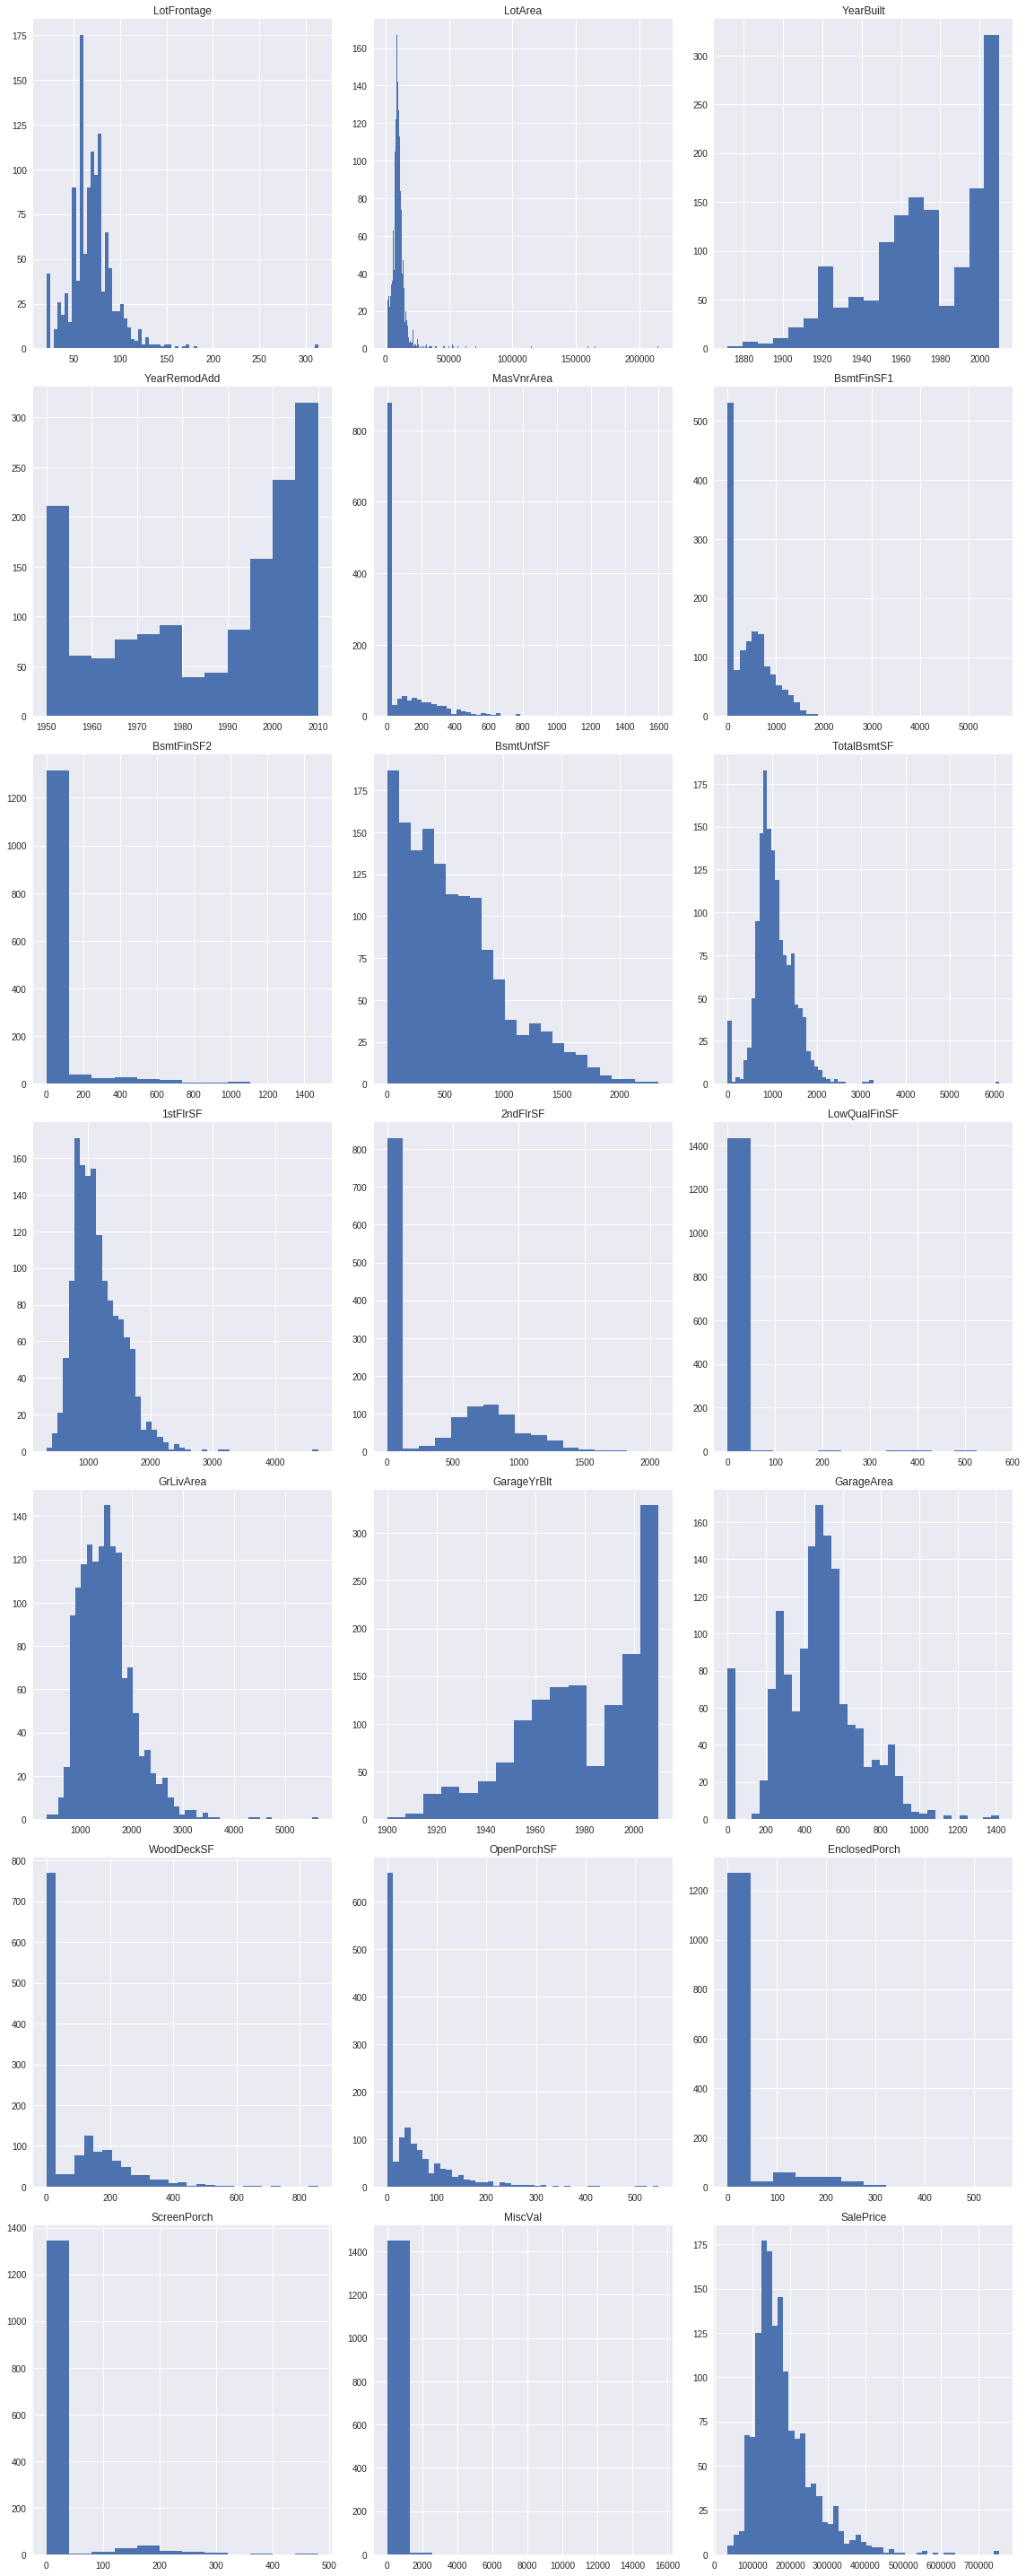

In [18]:
fig, axes = plt.subplots(nrows=(cat_data.shape[1] // 3), ncols=3, figsize=(16,40))

categoricals = [column for column in cat_data.columns if column != 'Id']

for col, ax in zip(categoricals, axes.flatten()):
    ax.hist(ames[col].dropna(), bins='auto')
    ax.set_title(col)
    
fig.tight_layout()

We can see from our histogram of the contiuous features that there are many examples where there are a ton of zeros. For example, WoodDeckSF (square footage of a wood deck) gives us a positive number indicating the size of the deck and zero if no deck exists. It might have made sense to categorize this variable to "deck exists or not (binary variable 1/0). Now you have a zero-inflated variable which is cumbersome to work with.

Lets drop these zero-inflated variables for now and select the features which don't have this characteristic.

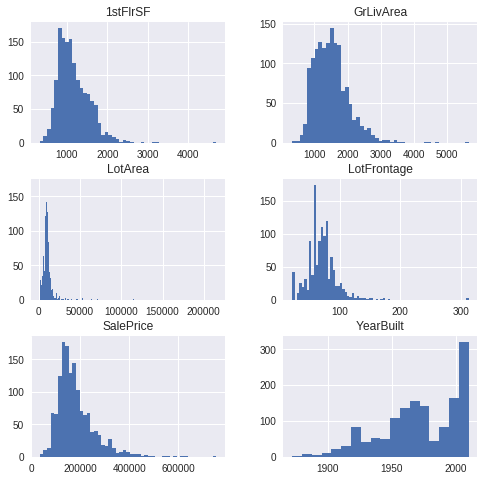

In [20]:
# Select non zero-inflated continuous features as ames_cont
continuous = ['LotFrontage', 'LotArea', 'YearBuilt', '1stFlrSF', 'GrLivArea', 'SalePrice']
ames_cont = ames[continuous]
ames_cont.hist(figsize  = [8, 8], bins='auto');

## Perform log transformations for the variables where it makes sense

In [21]:
# Your code here

continuous = ['LotFrontage', 'LotArea', 'YearBuilt', '1stFlrSF', 'GrLivArea', 'SalePrice']
ames_log = np.log(ames_cont)

import numpy as np
ames_log['LotFrontage'] = np.log(ames['LotFrontage'])
ames_log['LotArea'] = np.log(ames['LotArea'])
ames_log['YearBuilt'] = np.log(ames['YearBuilt'])
ames_log['1stFlrSF'] = np.log(ames['1stFlrSF'])
ames_log['GrLivArea'] = np.log(ames['GrLivArea'])
ames_log['SalePrice'] = np.log(ames['SalePrice'])

ames_log.hist(figsize  = [8, 8], bins='auto');


NameError: name 'ames_log' is not defined

## Standardize the continuous variables

Store your final features in a DataFrame `features_final`: 

In [ ]:
# Your code here

## Summary
Great! You've now got some hands-on practice transforming data using log transforms, feature scaling, and normalization!